In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Euler Cromer Method


$\omega_{i+1} = \omega_i + a_i \Delta t$

$\theta_{i+1} = \theta_{i} + \omega _{i+1} \Delta t$


$t_{i+1} = t_{i} + \Delta t$

Euler Cromer method preserves the energy at each cycle. you can proof that using the same approach usesd in the previouse section to show that the Euler method is not stable

In this section we are going to use the Euler Crommer method to solve the Driven NonLinear Pendulum

$\ddot \theta = -\dfrac{g}{l} sin(\theta) - q\dot \theta + F_D sin(\Omega_D t)$

and if we nondimentionalize the equation we will have:

(Note that the following differential equation with $m^*, s^*, kg^*$ (dimenstions of length, time, and mass in my units! for example in my units something is 1 meter start (which is equvalent to x meters). So in the following differential equation, if you calculate g in my units worlds, you will find that its value is $1 m^*/(s^*)^2$

$\ddot \theta = -\dfrac{g}{l}sin(\theta) - q\dot \theta + F_D sin(\Omega_D t)$

in which:

$g = 1 [\dfrac{m^*}{(s^*)^2}] = 10 [\dfrac{m}{s^2}]$

$ l = 1 [m^*] = L [m]$ (L is the length of the pendulum in meters)

$ f_d = F_D [1/s^2] = x [1/(s^*)^2]$


Using the obove two equations we can determine how many seconds is $1 [s^*]$


$s^* = \sqrt{\dfrac{L}{10}} s$


For example if we have F_D = 1.2, then calculating the f_d will be straight forward:


$F_D = 1.2 [1/s^2] = 1.2 * \dfrac{l}{10} [1/(s^*)^2]$


### Important Note about nondimensionalization:

Note that, here in my method of nondimentionalization, I did not removed the g,l, etc from the differential equation. Instead, I changed their 

In [2]:
class Env:
    def __init__(self, lengthD, timeD, massD):
        self.lengthD = lengthD
        self.timeD = timeD
        self.massD = massD
        
        
    def Sim2SI(self, value, quantity):
        if quantity == "mass":
            return value*self.massD
        if quantity == "length":
            return value*self.lengthD
        if quantity == "time":
            return value*self.timeD
        
    def SI2Sim(self, value, quantity):
        return value / self.Sim2SI(1, quantity)
    

In [49]:
class Pendulum:
    def __init__(self, theta, velocity, q , dt, g, l, Omega, FD):
        self.theta = theta
        self.velocity = velocity
        self.acceleration = -self.theta
        self.q = q
        self.dt = dt
        self.g = g
        self.l = l
        self.Omega = Omega
        self.FD = FD
        self.t = 0
        
    def move(self):
        self.solveVelocity()
        self.solveTheta()
        self.t += self.dt
    
    
    def solveTheta(self):
        self.theta += self.velocity*self.dt
        
    def solveVelocity(self):
        self.velocity += (-self.g/self.l *np.sin(self.theta) - self.q*self.velocity + self.FD*np.sin(self.Omega*self.t))*self.dt
    
    
    def moveForTimeT(self, time):
        N = time/self.dt
        positionList = np.zeros(int(N))
        EnergyList = np.zeros(int(N))
        velocityList = np.zeros(int(N))
        timeList = np.zeros(int(N))
        
        
        for i in range(int(N)):
            timeList[i] = self.t
            self.move()
            positionList[i] = self.theta  
            velocityList[i] = self.velocity
            
            
        return positionList, EnergyList, velocityList, timeList
    
    def calculateEnergy(self):
        return (0.5*self.velocity**2 + (1-np.cos(self.theta)) )
        

## Pendulum1

In [175]:
g_real = 10 #m/s^2
L_real = 10 # m
t_max = 120 #s
dt_real = 0.04 #s

position_real = 0.2 #theta
velocity_real = 0 # degree/sec
FD_real = 1.2 # 1/s^2
q_real = 0.5 # 1/s^2
Omega_real = 2/3 # 1/s^2

myEnv = Env(1,(L_real/g_real)**0.5,1) #length, time, mass


In [176]:
10* myEnv.SI2Sim(1, 'length')/myEnv.SI2Sim(1, "time")**2

10.0

In [177]:
myEnv.SI2Sim(1, "time")

1.0

In [178]:
position = position_real 

velocity = velocity_real * myEnv.SI2Sim(1,'length')/myEnv.SI2Sim(1,'time')

q = q_real * (1/myEnv.SI2Sim(1,'time')**2)

FD = FD_real * (1/myEnv.SI2Sim(1,'time')**2)

g = g_real * myEnv.SI2Sim(1, 'length')/myEnv.SI2Sim(1, "time")**2

dt = myEnv.SI2Sim(dt_real, 'time')

l = L_real * myEnv.SI2Sim(1,'length')

tmax_simulation =  myEnv.SI2Sim(t_max, 'time')

Omega = Omega_real / myEnv.SI2Sim(1,'time')


In [179]:
pendulum = Pendulum(position, velocity, q, dt, g, l, Omega, FD)

In [180]:
positionList, energyList, velocityList, timeList = pendulum.moveForTimeT(tmax_simulation)

In [181]:
timeList = myEnv.Sim2SI(timeList, 'time')


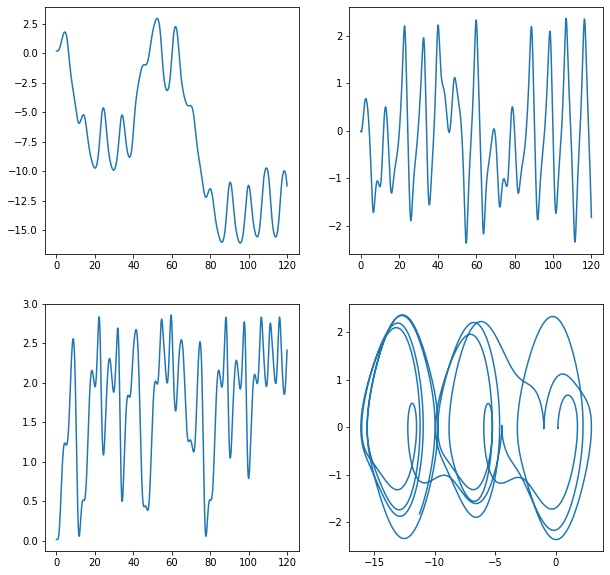

In [183]:
fig = plt.figure(figsize = (10,10))
fig.add_subplot(2,2,1)
plt.plot(timeList,positionList)
fig.add_subplot(2,2,2)
plt.plot(timeList,velocityList)
fig.add_subplot(2,2,3)
plt.plot(timeList,0.5*velocityList**2 + 1 - np.cos(positionList))
#plt.ylim([0,0.0001])
fig.add_subplot(2,2,4)
plt.plot(positionList, velocityList)

## Pendulum2

#### Pendulum 2 has initial value that differes from pendulum1 by .05

In [193]:
g_real = 10 #m/s^2
L_real = 10 # m
t_max = 120 #s
dt_real = 0.04 #s

position_real = 0.205 #theta
velocity_real = 0 # degree/sec
FD_real = 1.2 # 1/s^2
q_real = 0.5 # 1/s^2
Omega_real = 2/3 # 1/s^2

myEnv = Env(1,(L_real/g_real)**0.5,1) #length, time, mass


In [194]:
10* myEnv.SI2Sim(1, 'length')/myEnv.SI2Sim(1, "time")**2

10.0

In [195]:
myEnv.SI2Sim(1, "time")

1.0

In [196]:
position = position_real 

velocity = velocity_real * myEnv.SI2Sim(1,'length')/myEnv.SI2Sim(1,'time')

q = q_real * (1/myEnv.SI2Sim(1,'time')**2)

FD = FD_real * (1/myEnv.SI2Sim(1,'time')**2)

g = g_real * myEnv.SI2Sim(1, 'length')/myEnv.SI2Sim(1, "time")**2

dt = myEnv.SI2Sim(dt_real, 'time')

l = L_real * myEnv.SI2Sim(1,'length')

tmax_simulation =  myEnv.SI2Sim(t_max, 'time')

Omega = Omega_real / myEnv.SI2Sim(1,'time')


In [197]:
pendulum2 = Pendulum(position, velocity, q, dt, g, l, Omega, FD)

In [198]:
positionList2, energyList2, velocityList2, timeList2 = pendulum2.moveForTimeT(tmax_simulation)

In [199]:
timeList2 = myEnv.Sim2SI(timeList2, 'time')


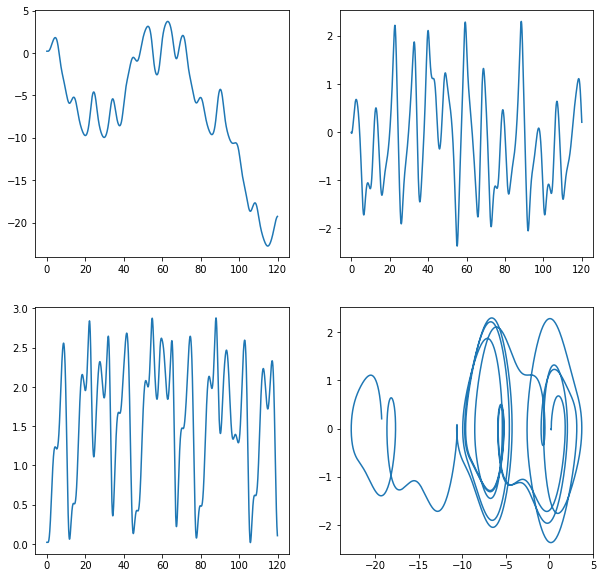

In [200]:
fig = plt.figure(figsize = (10,10))
fig.add_subplot(2,2,1)
plt.plot(timeList2,positionList2)
fig.add_subplot(2,2,2)
plt.plot(timeList2,velocityList2)
fig.add_subplot(2,2,3)
plt.plot(timeList2,0.5*velocityList2**2 + 1 - np.cos(positionList2))
#plt.ylim([0,0.0001])
fig.add_subplot(2,2,4)
plt.plot(positionList2, velocityList2)

### Calculating the difference between Pendulum1 and Pendulum2 with almost the same initial values

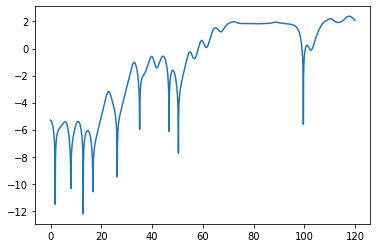

In [204]:
plt.plot(timeList, np.log(np.abs(positionList - positionList2)))